<a href="https://colab.research.google.com/github/soerenml/tf2/blob/master/Intro_Tensorflow_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Tensorflow 2.0

#### Requirements
*To use TF2.0 uninstall TF1.x first and reinstall TF2.0 afterwards.*

#### Learning
*First steps into TF2.0, no pipelining, no distributed trained etc.*

#### Source
*This tutorial closely follows A. Geron (2019), pp. 277-330.*

In [1]:
pip uninstall tensorflow

Uninstalling tensorflow-1.15.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/freeze_graph
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-1.15.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
    /usr/local/lib/python3.6/dist-packages/tensorflow_core/*
Proceed (y/n)? ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/pip/_internal/cli/base_command.py", line 153, in _main
    status = self.run(options, args)
  File "/usr/local/lib/python3.6/dist-packages/pip/_internal/commands/uninstall.py", line 79, in run
    auto_confirm=options.yes, verbose=self.verbosity > 0,
  File "/usr/local/lib/python3.6/dist-packages/pip/_internal/req/req_install.py", line 755, in uninstall
    u

In [0]:
pip install tensorflow==2.0

  Using cached https://files.pythonhosted.org/packages/46/0f/7bd55361168bb32796b360ad15a25de6966c9c1beb58a8e30c01c8279862/tensorflow-2.0.0-cp36-cp36m-manylinux2010_x86_64.whl


In [0]:
import tensorflow as tf
print(tf.__version__)

2.0.0


In [0]:
'''
Load the dataset using the Keras API.
'''
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [0]:
'''
Inspect the data.
The training data as numpy array of 60k rows with two 28*28 dimensions.
As the image data is non-RGB, no fourth dimension is needed. 
'''
X_train_full.shape

(60000, 28, 28)

In [0]:
'''
Creating a validation dataset.
Important: at this point, we do not have any form of pipelining in place.
'''
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.00
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [0]:
'''
Create the model using the sequential API
Flatten is used to create several one-dimensional array 60k times (1x784).
The first two dense-layers are fully connected layers with a relu function.
The final layer is dense with a softmax function, returning the probabilities
of each of the n classes defined (10 in our case.)
'''
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_13 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_14 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


The parameters are the result of the architecture.
As layers are fully connected, every neuron is connected to the neuron of the following layers. Hence, 1 neuron * 300 neurons for 784 neurons = 23,5200 plus 300 as the bias of layer 1 affects all neurons of layer 2 leads to 23,500 parameters.

In [0]:
# Show layers
print(model.layers)

# Select a layer
layer_3 = model.layers[2]
print(layer_3)

weights, biases = layer_3.get_weights()
print(weights)

print(weights.shape)
print(biases.shape)

[<tensorflow.python.keras.layers.core.Flatten object at 0x7fda91fa9400>, <tensorflow.python.keras.layers.core.Dense object at 0x7fda91fecfd0>, <tensorflow.python.keras.layers.core.Dense object at 0x7fda928e5748>, <tensorflow.python.keras.layers.core.Dense object at 0x7fda928c3e80>]
[[ 0.04022946  0.00943688  0.0719121  ... -0.10162966 -0.00895298
   0.08850146]
 [ 0.05020828  0.04836427  0.07373156 ...  0.09794597  0.10895649
  -0.10912757]
 [ 0.00955509  0.09932723 -0.06952668 ... -0.11178257  0.10390247
   0.08934333]
 ...
 [ 0.01047014  0.09085491  0.08073453 ... -0.09825135 -0.11275371
  -0.07523033]
 [ 0.12025804 -0.07428789 -0.09414864 ...  0.10923883 -0.11510509
   0.07554432]
 [ 0.02887958 -0.00452571  0.07868985 ... -0.08377469  0.0247236
  -0.00388654]]
(300, 100)
(100,)


In [0]:
'''
Compile the model
'''
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer=tf.keras.optimizers.SGD(lr=0.1),
              metrics=[tf.keras.metrics.sparse_categorical_accuracy])

In [0]:
import time # to check time of code to run
t0 = time.time()

history = model.fit(X_train,
                    y_train,
                    epochs=30,
                    validation_data=(X_valid, y_valid))

'''
If no seperate data validation should be used, take: <validation_split(0.1)>
in this case, validation data is taken from the training set.
'''

t1 = time.time()
print('Code time to run {}'.format(t1-t0))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 8s 138us/sample - loss: 0.1306 - sparse_categorical_accuracy: 0.9499 - top_k_categorical_accuracy: 0.7943 - val_loss: 0.3771 - val_sparse_categorical_accuracy: 0.8894 - val_top_k_categorical_accuracy: 0.8780
Epoch 2/30
55000/55000 [==============================] - 7s 127us/sample - loss: 0.1289 - sparse_categorical_accuracy: 0.9504 - top_k_categorical_accuracy: 0.7908 - val_loss: 0.3695 - val_sparse_categorical_accuracy: 0.8954 - val_top_k_categorical_accuracy: 0.8176
Epoch 3/30
55000/55000 [==============================] - 7s 130us/sample - loss: 0.1265 - sparse_categorical_accuracy: 0.9511 - top_k_categorical_accuracy: 0.7825 - val_loss: 0.4106 - val_sparse_categorical_accuracy: 0.8812 - val_top_k_categorical_accuracy: 0.8718
Epoch 4/30
55000/55000 [==============================] - 7s 127us/sample - loss: 0.1239 - sparse_categorical_accuracy: 0.9524 - top_k_categorical_accura

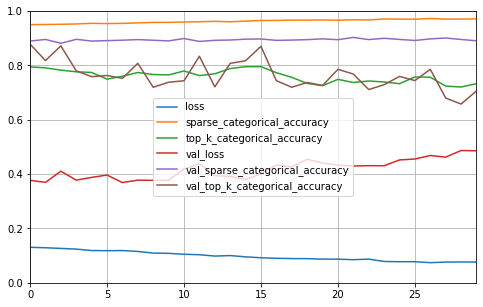

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [0]:
print(model.evaluate(X_test, y_test))

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [0]:
'''
Predict
'''
test = X_test[:1] / 255.0
test = model.predict(test)
test.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)